## Ejemplo flujo Aequitas

In [3]:
%pip install "aequitas" &> /dev/null

Note: you may need to restart the kernel to use updated packages.


In [1]:
#Instalar aequitas y llamar librerías necesarias

import pandas as pd
import seaborn as sns
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
from aequitas.plotting import Plot
from aequitas.audit import Audit
import aequitas.plot as ap

# import warnings; warnings.simplefilter('ignore')
%matplotlib inline

ModuleNotFoundError: No module named 'aequitas.audit'

In [2]:
#Cargar los datos
#En este caso lo estoy haciendo con los datos ejemplo de aequitas.
#El dataset se llama COMPAS y se usa para predecir reincidencia delictiva en EEUU

df = pd.read_csv("https://github.com/dssg/aequitas/raw/master/examples/data/compas_for_aequitas.csv")
df.head()

,entity_id,score,label_value,race,sex,age_cat
0,1,0.0,0,Other,Male,Greater than 45
1,3,0.0,1,African-American,Male,25 - 45
2,4,0.0,1,African-American,Male,Less than 25
3,5,1.0,0,African-American,Male,Less than 25
4,6,0.0,0,Other,Male,25 - 45


In [3]:
df.shape

(7214, 6)

## Explorar los datos

**Actualmente nosotros tenemos varias preguntas que yo mantendria:**

-Cargar los datos, especificar la hoja donde están

-Seleccionar las variables protegidas, valores reales y predicciones del modelo

-Distribución en un gráfico de los valores reales y predicciones del modelo

**El flujo ejemplo de aequitas incluye como análisis:**

-Gráficos de distribución de las variables protegidas para los valores reales

-Gráficos de distribución de las variables protegidas para las preddicciones del modelo

**Hay que tener ojo de tener las etiquetas del grafico en español en nuestra herramienta**


In [4]:
#Escoger colores (podemos cambiar a los colores de Algoritmos Éticos)
aq_palette = sns.diverging_palette(225, 35, n=2)

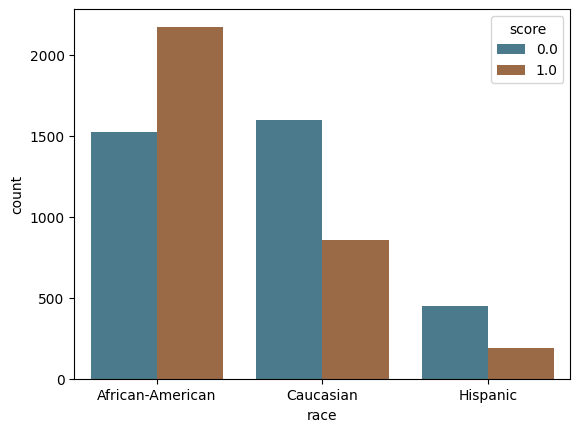

In [5]:
#Graficar distribuciones para raza, sexo y edad, que son las tres variables protegidas en este caso, segun predicciones del modelo
by_race = sns.countplot(x="race", hue="score", data=df[df.race.isin(['African-American', 'Caucasian', 'Hispanic'])], palette=aq_palette)

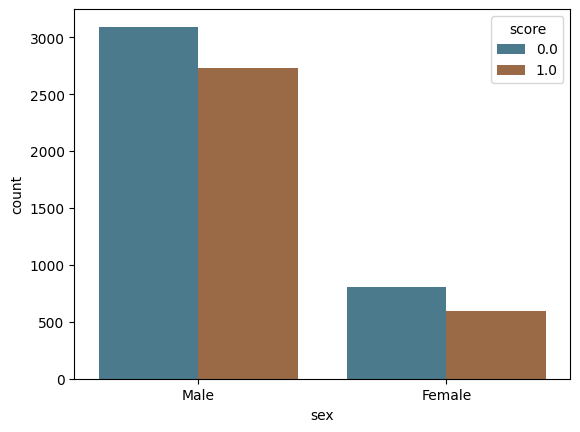

In [6]:
by_sex = sns.countplot(x="sex", hue="score", data=df, palette=aq_palette)

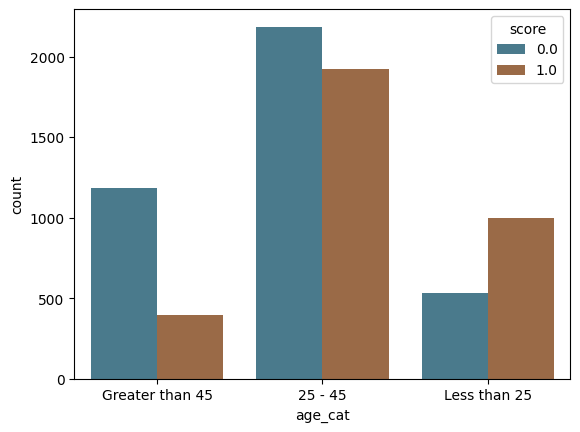

In [7]:
by_age = sns.countplot(x="age_cat", hue="score", data=df, palette=aq_palette)

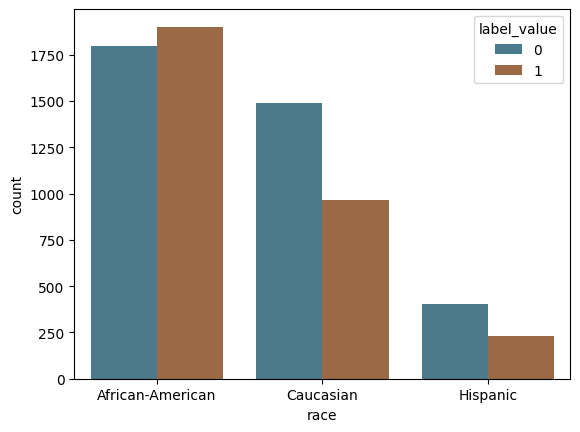

In [8]:
#Graficar distribuciones para raza, sexo y edad, que son las tres variables protegidas en este caso, segun valores reales del modelo
label_by_race = sns.countplot(x="race", hue="label_value", data=df[df.race.isin(['African-American', 'Caucasian', 'Hispanic'])], palette=aq_palette)

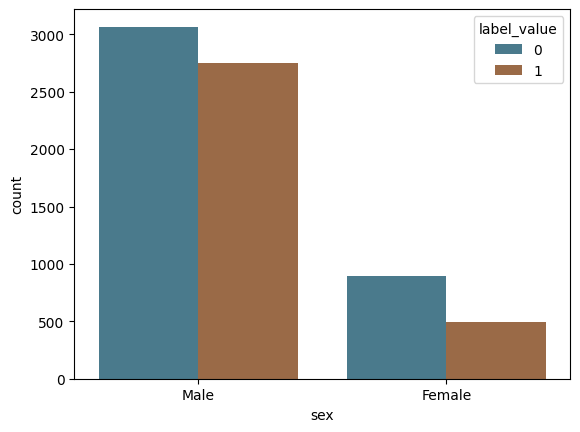

In [9]:
label_by_age = sns.countplot(x="sex", hue="label_value", data=df, palette=aq_palette)

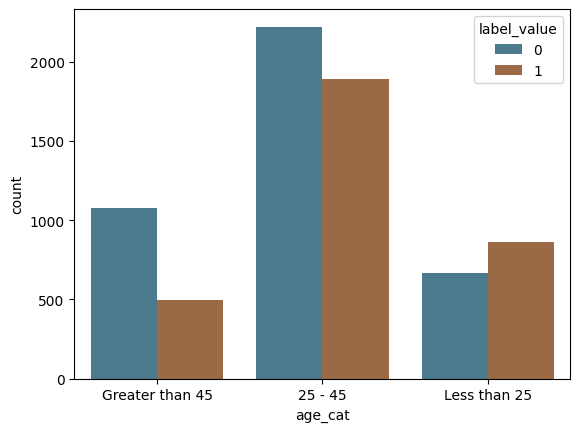

In [10]:
label_by_sex = sns.countplot(x="age_cat", hue="label_value", data=df, palette=aq_palette)

En todo lo anterior, Aequitas grafica primero las predicciones y despues los valores reales. Yo pondria los graficos lado a lado segun cada variable, algo así:

Raza:
Dist. Predicion gráfico 1 - Dist Valores reales gráfico 2

Sexo:
Dist. Predicion gráfico 3 - Dist Valores reales gráfico 3

Edad:
Dist. Predicion grafico 5 - Dist Valores reales gráfico 6

## Análisis de sesgo y equidad

Aplicar Aequitas es un proceso de 3 partes, que usa 3 clases de python:

`Group()`: Definir grupos y calcular errores

`Bias()`: Calculate disparidades (tasas de un grupo vs otro)

`Fairness()`: Evaluar equidad estadística

Cada clase se basa en la anterior, así que es un proceso secuencial


<a id='existing_biases'></a>

## Identificar sesgos en el modelo

### _Aequitas Group() Class_

In [11]:
#La clase Group crea un df de todas las metricas por subgrupo de variables
#Al ejecutar get_crosstabs() de la clase Group(), obtenemos un df con
#los recuentos de cada subgrupo y las métricas de error de los valores del subgrupo.
g = Group()
xtab, _ = g.get_crosstabs(df)

<a id='counts_description'></a>
Esta es la leyenda de las tablas que se muestran mas abajo. Debemos incluir la leyenda traducida.

#### Group Counts Calculated:

| Count Type | Column Name |
| --- | --- |
| False Positive Count | 'fp' |
| False Negative Count | 'fn' |
| True Negative Count | 'tn' |
| True Positive Count | 'tp' |
| Predicted Positive Count | 'pp' |
| Predicted Negative Count | 'pn' |
| Count of Negative Labels in Group | 'group_label_neg' |
| Count of Positive Labels in Group | 'group_label_pos' |
| Group Size | 'group_size'|
| Total Entities | 'total_entities' |

#### Absolute Metrics Calculated:

| Metric | Column Name |
| --- | --- |
| True Positive Rate | 'tpr' |
| True Negative Rate | 'tnr' |
| False Omission Rate | 'for' |
| False Discovery Rate | 'fdr' |
| False Positive Rate | 'fpr' |
| False Negative Rate | 'fnr' |
| Negative Predictive Value | 'npv' |
| Precision | 'precision' |
| Predicted Positive Ratio$_k$ | 'ppr' |
| Predicted Positive Ratio$_g$ | 'pprev' |
| Group Prevalence | 'prev' |


In [13]:
#Para dividir las tablas siguientes tablas y que queden como metricas de conteo y metricas de error
absolute_metrics = g.list_absolute_metrics(xtab)

In [14]:
#Tabla "Total de instancias para cada subgrupo"
#Debemos cambiar los titulos de las columnas a español y no siglas para que se entienda
xtab[[col for col in xtab.columns if col not in absolute_metrics]]

,model_id,score_threshold,k,attribute_name,attribute_value,pp,pn,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities
0,0,binary 0/1,3317,race,African-American,2174,1522,805,532,990,1369,1901,1795,3696,7214
1,0,binary 0/1,3317,race,Asian,8,24,2,3,21,6,9,23,32,7214
2,0,binary 0/1,3317,race,Caucasian,854,1600,349,461,1139,505,966,1488,2454,7214
3,0,binary 0/1,3317,race,Hispanic,190,447,87,129,318,103,232,405,637,7214
4,0,binary 0/1,3317,race,Native American,12,6,3,1,5,9,10,8,18,7214
5,0,binary 0/1,3317,race,Other,79,298,36,90,208,43,133,244,377,7214
6,0,binary 0/1,3317,sex,Female,591,804,288,195,609,303,498,897,1395,7214
7,0,binary 0/1,3317,sex,Male,2726,3093,994,1021,2072,1732,2753,3066,5819,7214
8,0,binary 0/1,3317,age_cat,25 - 45,1924,2185,741,706,1479,1183,1889,2220,4109,7214
9,0,binary 0/1,3317,age_cat,Greater than 45,394,1182,181,285,897,213,498,1078,1576,7214


In [15]:
#Tabla "Métricas de error para cada subgrupo"
#Debemos cambiar los titulos de las columnas a español y no siglas para que se entienda
xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)

,attribute_name,attribute_value,accuracy,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,race,African-American,0.64,0.72,0.55,0.35,0.37,0.45,0.28,0.65,0.63,0.66,0.59,0.51
1,race,Asian,0.84,0.67,0.91,0.12,0.25,0.09,0.33,0.88,0.75,0.00,0.25,0.28
2,race,Caucasian,0.67,0.52,0.77,0.29,0.41,0.23,0.48,0.71,0.59,0.26,0.35,0.39
3,race,Hispanic,0.66,0.44,0.79,0.29,0.46,0.21,0.56,0.71,0.54,0.06,0.30,0.36
4,race,Native American,0.78,0.90,0.62,0.17,0.25,0.38,0.10,0.83,0.75,0.00,0.67,0.56
5,race,Other,0.67,0.32,0.85,0.30,0.46,0.15,0.68,0.70,0.54,0.02,0.21,0.35
6,sex,Female,0.65,0.61,0.68,0.24,0.49,0.32,0.39,0.76,0.51,0.18,0.42,0.36
7,sex,Male,0.65,0.63,0.68,0.33,0.36,0.32,0.37,0.67,0.64,0.82,0.47,0.47
8,age_cat,25 - 45,0.65,0.63,0.67,0.32,0.39,0.33,0.37,0.68,0.61,0.58,0.47,0.46
9,age_cat,Greater than 45,0.70,0.43,0.83,0.24,0.46,0.17,0.57,0.76,0.54,0.12,0.25,0.32


Aqui deberia incluir las definiciones de las metricas principales.


In [16]:
#Las métricas de "Group" se visualizan con la clase "Plot"
aqp = Plot()

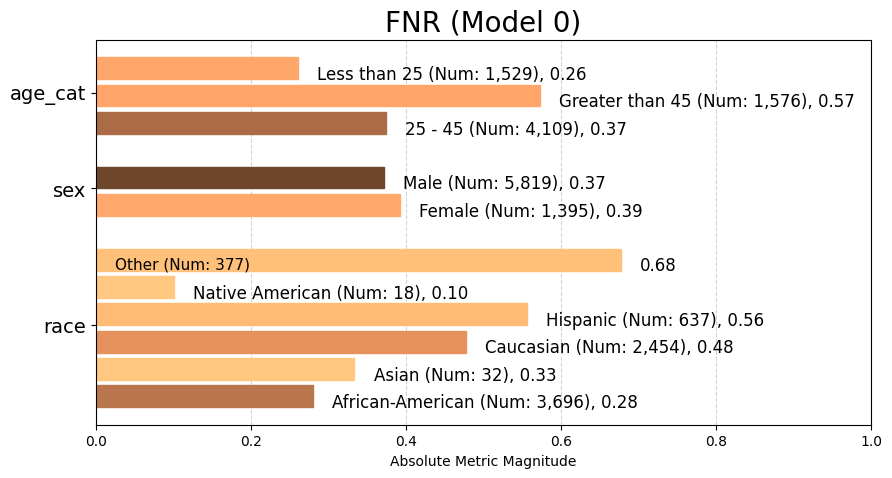

In [ ]:
#Visualizar una métrica de error (segunda tabla)
fnr = aqp.plot_group_metric(xtab, 'fnr')

#Recordar traducir los titulos y etiquetas a español
#La lista de todas las metricas disponibles es: accuracy	tpr	tnr	for	fdr	fpr	fnr	npv	precision	ppr	pprev	prev
#Deberia haber una forma de seleccionar en la plataforma que metrica queremos visualizar (segundo parametro de la funcion)
#Arriba/al lado de este grafico, podria desplegarse la definición de cada métrica y cómo interpretarla (escrito)


<a id='disparities'></a>

## Identificar sesgo o inequidades entre los grupos

### _Aequitas Bias() Class_
Group calcula métricas absolutas para cada subgrupo y Bias compara/divide estos valores para identificar sesgo.

(Similar a lo que hace ahora nuestra herramienta, que calcula primero las métricas para cada subgrupo y luego realiza la división de un_grupo/otro_grupo)


#### Disparities Calculated Calcuated:

| Metric | Column Name |
| --- | --- |
| True Positive Rate Disparity | 'tpr_disprity' |
| True Negative Rate | 'tnr_disparity' |
| False Omission Rate | 'for_disparity' |
| False Discovery Rate | 'fdr_disparity' |
| False Positive Rate | 'fpr_disparity' |
| False NegativeRate | 'fnr_disparity' |
| Negative Predictive Value | 'npv_disparity' |
| Precision Disparity | 'precision_disparity' |
| Predicted Positive Ratio$_k$ Disparity | 'ppr_disparity' |
| Predicted Positive Ratio$_g$ Disparity | 'pprev_disparity' |


In [ ]:
#Ejecutar linea para usar funciones de la clase Bias
b = Bias()

Hay 3 formas de seleccionar el grupo de referencia:

1. el usuario escoge,
2. se escoge automaticamente el grupo con mas personas/instancias o,
3. se escoge el grupo con menor error (este calculo se realiza en la seccion anterior)

Abajo deje las 3 funciones para hacerlo. La persona deberia poder escoger si quiere seleccionar el grupo por su cuenta o si quiere usar alguno de los 2 criterios automáticos (y cuál).

In [ ]:
#Con esta función se calculan las disparidades (divisiones-tasas) y el usuario puede escoger cuál es el grupo de referencia
#Aca escoge caucasico para raza, hombre para genero y 25-45 para edad, esto debe quedar a criterio del usuario en esta funcion
bdf = b.get_disparity_predefined_groups(xtab, original_df=df, ref_groups_dict={'race':'Caucasian', 'sex':'Male', 'age_cat':'25 - 45'}, alpha=0.05, mask_significance=True)
bdf.style

,model_id,score_threshold,k,attribute_name,attribute_value,accuracy,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value
0,0,binary 0/1,3317,race,African-American,0.638258,0.720147,0.551532,0.349540,0.370285,0.448468,0.279853,0.650460,0.629715,2174,1522,0.655412,0.588203,805,532,990,1369,1901,1795,3696,7214,0.514340,2.545667,1.690224,1.064904,0.906085,1.213154,1.912093,0.586416,1.377549,0.720526,0.913728,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
1,0,binary 0/1,3317,race,Asian,0.843750,0.666667,0.913043,0.125000,0.250000,0.086957,0.333333,0.875000,0.750000,8,24,0.002412,0.250000,2,3,21,6,9,23,32,7214,0.281250,0.009368,0.718384,1.268317,0.611748,0.433839,0.370749,0.698482,1.275248,1.192808,1.229148,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
2,0,binary 0/1,3317,race,Caucasian,0.669927,0.522774,0.765457,0.288125,0.408665,0.234543,0.477226,0.711875,0.591335,854,1600,0.257462,0.348003,349,461,1139,505,966,1488,2454,7214,0.393643,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
3,0,binary 0/1,3317,race,Hispanic,0.660911,0.443966,0.785185,0.288591,0.457895,0.214815,0.556034,0.711409,0.542105,190,447,0.057281,0.298273,87,129,318,103,232,405,637,7214,0.364207,0.222482,0.857099,0.916748,1.120464,1.001616,0.915887,1.165140,0.849249,1.025773,0.999346,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
4,0,binary 0/1,3317,race,Native American,0.777778,0.900000,0.625000,0.166667,0.250000,0.375000,0.100000,0.833333,0.750000,12,6,0.003618,0.666667,3,1,5,9,10,8,18,7214,0.555556,0.014052,1.915691,1.268317,0.611748,0.578453,1.598854,0.209544,1.721584,0.816506,1.170618,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
5,0,binary 0/1,3317,race,Other,0.665782,0.323308,0.852459,0.302013,0.455696,0.147541,0.676692,0.697987,0.544304,79,298,0.023817,0.209549,36,90,208,43,133,244,377,7214,0.352785,0.092506,0.602147,0.920466,1.115085,1.048203,0.629057,1.417970,0.618447,1.113660,0.980490,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
6,0,binary 0/1,3317,sex,Female,0.653763,0.608434,0.678930,0.242537,0.487310,0.321070,0.391566,0.757463,0.512690,591,804,0.178173,0.423656,288,195,609,303,498,897,1395,7214,0.356989,0.216801,0.904348,0.806925,1.336425,0.734738,0.990343,1.055810,0.967101,1.004633,1.130710,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
7,0,binary 0/1,3317,sex,Male,0.653721,0.629132,0.675799,0.330100,0.364637,0.324201,0.370868,0.669900,0.635363,2726,3093,0.821827,0.468465,994,1021,2072,1732,2753,3066,5819,7214,0.473105,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
8,0,binary 0/1,3317,age_cat,25 - 45,0.647846,0.626257,0.666216,0.323112,0.385135,0.333784,0.373743,0.676888,0.614865,1924,2185,0.580042,0.468240,741,706,1479,1183,1889,2220,4109,7214,0.459723,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45
9,0,binary 0/1,3317,age_cat,Greater than 45,0.704315,0.427711,0.832096,0.241117,0.459391,0.167904,0.572289,0.758883,0.540609,394,1182,0.118782,0.250000,181,285,897,213,498,1078,1576,7214,0.315990,0.204782,0.533914,

In [ ]:
#Con esta función se calculan las disparidades (divisiones-tasas) y el grupo de referencia se asigna automáticamente al subgrupo con mas instancias (mayor prevalencia)
bdfs = b.get_disparity_major_group(xtab, original_df=df, mask_significance=True)
bdfs.style

,model_id,score_threshold,k,attribute_name,attribute_value,accuracy,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value
0,0,binary 0/1,3317,race,African-American,0.638258,0.720147,0.551532,0.349540,0.370285,0.448468,0.279853,0.650460,0.629715,2174,1522,0.655412,0.588203,805,532,990,1369,1901,1795,3696,7214,0.514340,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American
1,0,binary 0/1,3317,race,Asian,0.843750,0.666667,0.913043,0.125000,0.250000,0.086957,0.333333,0.875000,0.750000,8,24,0.002412,0.250000,2,3,21,6,9,23,32,7214,0.281250,0.003680,0.425023,1.191015,0.675155,0.357613,0.193897,1.191103,0.925737,1.655468,1.345202,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American
2,0,binary 0/1,3317,race,Caucasian,0.669927,0.522774,0.765457,0.288125,0.408665,0.234543,0.477226,0.711875,0.591335,854,1600,0.257462,0.348003,349,461,1139,505,966,1488,2454,7214,0.393643,0.392824,0.591638,0.939052,1.103650,0.824297,0.522987,1.705274,0.725927,1.387874,1.094418,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American
3,0,binary 0/1,3317,race,Hispanic,0.660911,0.443966,0.785185,0.288591,0.457895,0.214815,0.556034,0.711409,0.542105,190,447,0.057281,0.298273,87,129,318,103,232,405,637,7214,0.364207,0.087397,0.507092,0.860874,1.236600,0.825630,0.478997,1.986883,0.616493,1.423644,1.093702,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American
4,0,binary 0/1,3317,race,Native American,0.777778,0.900000,0.625000,0.166667,0.250000,0.375000,0.100000,0.833333,0.750000,12,6,0.003618,0.666667,3,1,5,9,10,8,18,7214,0.555556,0.005520,1.133395,1.191015,0.675155,0.476817,0.836180,0.357331,1.249744,1.133207,1.281145,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American
5,0,binary 0/1,3317,race,Other,0.665782,0.323308,0.852459,0.302013,0.455696,0.147541,0.676692,0.697987,0.544304,79,298,0.023817,0.209549,36,90,208,43,133,244,377,7214,0.352785,0.036339,0.356253,0.864366,1.230663,0.864031,0.328989,2.418028,0.448947,1.545620,1.073066,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American
6,0,binary 0/1,3317,sex,Female,0.653763,0.608434,0.678930,0.242537,0.487310,0.321070,0.391566,0.757463,0.512690,591,804,0.178173,0.423656,288,195,609,303,498,897,1395,7214,0.356989,0.216801,0.904348,0.806925,1.336425,0.734738,0.990343,1.055810,0.967101,1.004633,1.130710,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
7,0,binary 0/1,3317,sex,Male,0.653721,0.629132,0.675799,0.330100,0.364637,0.324201,0.370868,0.669900,0.635363,2726,3093,0.821827,0.468465,994,1021,2072,1732,2753,3066,5819,7214,0.473105,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
8,0,binary 0/1,3317,age_cat,25 - 45,0.647846,0.626257,0.666216,0.323112,0.385135,0.333784,0.373743,0.676888,0.614865,1924,2185,0.580042,0.468240,741,706,147

In [ ]:
#Con esta función se calculan las disparidades (divisiones-tasas) y el grupo de referencia se asigna automáticamente al subgrupo con menor error (de esa métrica) en la tabla de errores calculada en Group
bdfmin = b.get_disparity_min_metric(xtab, original_df=df, label_score_ref='fpr')
bdfmin.style

,model_id,score_threshold,k,attribute_name,attribute_value,accuracy,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,ppr_disparity,ppr_ref_group_value,pprev_disparity,pprev_ref_group_value,precision_disparity,precision_ref_group_value,fdr_disparity,fdr_ref_group_value,for_disparity,for_ref_group_value,fpr_disparity,fpr_ref_group_value,fnr_disparity,fnr_ref_group_value,tpr_disparity,tpr_ref_group_value,tnr_disparity,tnr_ref_group_value,npv_disparity,npv_ref_group_value
0,0,binary 0/1,3317,race,African-American,0.638258,0.720147,0.551532,0.349540,0.370285,0.448468,0.279853,0.650460,0.629715,2174,1522,0.655412,0.588203,805,532,990,1369,1901,1795,3696,7214,0.514340,271.750000,Asian,2.806996,Other,1.161610,Hispanic,1.481141,Asian,2.796321,Asian,5.157382,Asian,2.798527,Native American,2.227432,Other,1.000000,African-American,1.000000,African-American
1,0,binary 0/1,3317,race,Asian,0.843750,0.666667,0.913043,0.125000,0.250000,0.086957,0.333333,0.875000,0.750000,8,24,0.002412,0.250000,2,3,21,6,9,23,32,7214,0.281250,1.000000,Asian,1.193038,Other,1.383495,Hispanic,1.000000,Asian,1.000000,Asian,1.000000,Asian,3.333333,Native American,2.062016,Other,1.655468,African-American,1.345202,African-American
2,0,binary 0/1,3317,race,Caucasian,0.669927,0.522774,0.765457,0.288125,0.408665,0.234543,0.477226,0.711875,0.591335,854,1600,0.257462,0.348003,349,461,1139,505,966,1488,2454,7214,0.393643,106.750000,Asian,1.660724,Other,1.090812,Hispanic,1.634660,Asian,2.305000,Asian,2.697245,Asian,4.772257,Native American,1.616953,Other,1.387874,African-American,1.094418,African-American
3,0,binary 0/1,3317,race,Hispanic,0.660911,0.443966,0.785185,0.288591,0.457895,0.214815,0.556034,0.711409,0.542105,190,447,0.057281,0.298273,87,129,318,103,232,405,637,7214,0.364207,23.750000,Asian,1.423405,Other,1.000000,Hispanic,1.831579,Asian,2.308725,Asian,2.470370,Asian,5.560345,Native American,1.373196,Other,1.423644,African-American,1.093702,African-American
4,0,binary 0/1,3317,race,Native American,0.777778,0.900000,0.625000,0.166667,0.250000,0.375000,0.100000,0.833333,0.750000,12,6,0.003618,0.666667,3,1,5,9,10,8,18,7214,0.555556,1.500000,Asian,3.181435,Other,1.383495,Hispanic,1.000000,Asian,1.333333,Asian,4.312500,Asian,1.000000,Native American,2.783721,Other,1.133207,African-American,1.281145,African-American
5,0,binary 0/1,3317,race,Other,0.665782,0.323308,0.852459,0.302013,0.455696,0.147541,0.676692,0.697987,0.544304,79,298,0.023817,0.209549,36,90,208,43,133,244,377,7214,0.352785,9.875000,Asian,1.000000,Other,1.004056,Hispanic,1.822785,Asian,2.416107,Asian,1.696721,Asian,6.766917,Native American,1.000000,Other,1.545620,African-American,1.073066,African-American
6,0,binary 0/1,3317,sex,Female,0.653763,0.608434,0.678930,0.242537,0.487310,0.321070,0.391566,0.757463,0.512690,591,804,0.178173,0.423656,288,195,609,303,498,897,1395,7214,0.356989,1.000000,Female,1.000000,Female,1.000000,Female,1.336425,Male,1.000000,Female,1.000000,Female,1.055810,Male,1.000000,Female,1.004633,Male,1.130710,Male
7,0,binary 0/1,3317,sex,Male,0.653721,0.629132,0.675799,0.330100,0.364637,0.324201,0.370868,0.669900,0.635363,2726,3093,0.821827,0.468465,994,1021,2072,1732,2753,3066,5819,7214,0.473105,4.612521,Female,1.105769,Female,1.239273,Female,1.000000,Male,1.361029,Female,1.009751,Female,1.000000,Male,1.034019,Female,1.000000,Male,1.000000,Male
8,0,binary 0/1,3317,age_cat,25 - 45,0.647846,0.626257,0.666216,0.323112,0.385135,0.333784,0.373743,0.676888,0.614865,1924,2185,0.580042,0.468240,741,706,1479,1183,1889,2220,4109,7214,0.459723,4.883249,Greater than 45,1.872962,Greater than 45,1.137356,Greater than 45,1.068750,Less than 25,1.340065,Greater than 45,1.987950,Greater than 45,1.435172,Less than 25,1.464207,Greater than 45,1.452570,Less than 25,1.176231,Less than 25
9,0,binary 0/1,3317,age_cat,Greater than 45,0.704315,0.427711,0.832096,0.241117,0.459391,0.167904,0.572289,0.758883,0.540609,394,1182,0.118782,0.25

Otra forma de ejecutar la misma función de arriba

In [ ]:
#Esta funcion hace exactamente lo mismo que "get_disparity_predefined_groups" de la clase Bias, que ejecutamos más arriba
#Es decir, calcular disparidades con el usuario escogiendo el grupo de referencia

#La volvemos a ejecutar porque la necesitamos para los gráficos de visualización más abajo,
#pero no es necesario que se vea en la plataforma mientras se ejecute la de arriba

audit = Audit(df.drop(columns=["entity_id"]), label_column="label_value",
              reference_groups={'race':'Caucasian', 'sex':'Male', 'age_cat':'25 - 45'})

audit.audit(bias_args={
    "alpha": 0.05,
    "check_significance": True,
    "mask_significance": True
})

audit.disparity_df.style

/usr/local/lib/python3.10/dist-packages/aequitas/bias.py:441: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[True, False, False, True, True, True, True, False, False, True, True]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:, significance_cols] = np.select(
/usr/local/lib/python3.10/dist-packages/aequitas/bias.py:441: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[True, False, False, False, False, False, True, False, False, True, True]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:, significance_cols] = np.select(
/usr/local/lib/python3.10/dist-packages/aequitas/bias.py:441: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[True, False, False, False, False, False, True,

,model_id,score_threshold,k,attribute_name,attribute_value,accuracy,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,label_value_significance,score_significance,fdr_disparity,fdr_ref_group_value,fdr_significance,fnr_disparity,fnr_ref_group_value,fnr_significance,for_disparity,for_ref_group_value,for_significance,fpr_disparity,fpr_ref_group_value,fpr_significance,npv_disparity,npv_ref_group_value,npv_significance,ppr_disparity,ppr_ref_group_value,ppr_significance,pprev_disparity,pprev_ref_group_value,pprev_significance,precision_disparity,precision_ref_group_value,precision_significance,tnr_disparity,tnr_ref_group_value,tnr_significance,tpr_disparity,tpr_ref_group_value,tpr_significance
0,0,binary 0/1,3317,race,African-American,0.638258,0.720147,0.551532,0.349540,0.370285,0.448468,0.279853,0.650460,0.629715,2174,1522,0.655412,0.588203,805,532,990,1369,1901,1795,3696,7214,0.514340,True,True,0.906085,Caucasian,False,0.586416,Caucasian,True,1.213154,Caucasian,True,1.912093,Caucasian,False,0.913728,Caucasian,True,2.545667,Caucasian,True,1.690224,Caucasian,True,1.064904,Caucasian,False,0.720526,Caucasian,False,1.377549,Caucasian,True
1,0,binary 0/1,3317,race,Asian,0.843750,0.666667,0.913043,0.125000,0.250000,0.086957,0.333333,0.875000,0.750000,8,24,0.002412,0.250000,2,3,21,6,9,23,32,7214,0.281250,False,False,0.611748,Caucasian,False,0.698482,Caucasian,False,0.433839,Caucasian,False,0.370749,Caucasian,False,1.229148,Caucasian,False,0.009368,Caucasian,False,0.718384,Caucasian,False,1.268317,Caucasian,False,1.192808,Caucasian,False,1.275248,Caucasian,False
2,0,binary 0/1,3317,race,Caucasian,0.669927,0.522774,0.765457,0.288125,0.408665,0.234543,0.477226,0.711875,0.591335,854,1600,0.257462,0.348003,349,461,1139,505,966,1488,2454,7214,0.393643,False,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False
3,0,binary 0/1,3317,race,Hispanic,0.660911,0.443966,0.785185,0.288591,0.457895,0.214815,0.556034,0.711409,0.542105,190,447,0.057281,0.298273,87,129,318,103,232,405,637,7214,0.364207,False,True,1.120464,Caucasian,False,1.165140,Caucasian,False,1.001616,Caucasian,False,0.915887,Caucasian,False,0.999346,Caucasian,False,0.222482,Caucasian,True,0.857099,Caucasian,True,0.916748,Caucasian,False,1.025773,Caucasian,False,0.849249,Caucasian,False
4,0,binary 0/1,3317,race,Native American,0.777778,0.900000,0.625000,0.166667,0.250000,0.375000,0.100000,0.833333,0.750000,12,6,0.003618,0.666667,3,1,5,9,10,8,18,7214,0.555556,False,True,0.611748,Caucasian,False,0.209544,Caucasian,False,0.578453,Caucasian,False,1.598854,Caucasian,False,1.170618,Caucasian,False,0.014052,Caucasian,True,1.915691,Caucasian,True,1.268317,Caucasian,False,0.816506,Caucasian,False,1.721584,Caucasian,False
5,0,binary 0/1,3317,race,Other,0.665782,0.323308,0.852459,0.302013,0.455696,0.147541,0.676692,0.697987,0.544304,79,298,0.023817,0.209549,36,90,208,43,133,244,377,7214,0.352785,False,True,1.115085,Caucasian,False,1.417970,Caucasian,False,1.048203,Caucasian,False,0.629057,Caucasian,False,0.980490,Caucasian,False,0.092506,Caucasian,True,0.602147,Caucasian,True,0.920466,Caucasian,False,1.113660,Caucasian,False,0.618447,Caucasian,False
6,0,binary 0/1,3317,sex,Female,0.653763,0.608434,0.678930,0.242537,0.487310,0.321070,0.391566,0.757463,0.512690,591,804,0.178173,0.423656,288,195,609,303,498,897,1395,7214,0.356989,True,True,1.336425,Male,True,1.055810,Male,True,0.734738,Male,True,0.990343,Male,True,1.130710,Male,True,0.216801,Male,True,0.904348,Male,True,0.806925,Male,True,1.004633,Male,True,0.967101,Male,True
7,0,binary 0/1,3317,sex,Male,0.653721,0.629132,0.675799,0.330100,0.364637,0.324201,0.370868,0.669900,0.635363,2726,3093,0.821827,0.468465,994,1021,2072,1732,2753,3066,5819,7214,0.473105,False,False,1.00000

In [ ]:
#Lista de disparidades que se calcularon (es la misma tabla que arriba, pero solo disparidades)
audit.disparities.style

Escoger el umbral de tolerancia y las métricas que nos interesa analizar (usando el arbol de aequitas)

In [ ]:
#Escogemos las métricas que nos importan según nuestro modelo y el umbral de tolerancia
#Es importante que el umbral de tolerancia tenga 2 decimales, actualmente el nuestro tiene 1
#Acá debemos incluir un arbol de metricas como el de aequitas, para que la persona pueda seleccionar las métricas que le interesan

metrics = ['fpr','fdr'] #Use estas 2 metricas pero el usuario deberia poder escoger
disparity_tolerance = 1.25



# Visualizaciones de la clase Bias

Recordar traducir los títulos, etiquetas y leyenda

Para leer los gráficos se debe tener en cuenta lo siguiente (podemos escribirlo en la plataforma):

Los grupos de referencia se muestran en gris y siempre tienen una disparidad = 1. Ten en cuenta que las disparidades mayores a 10 veces el grupo de referencia se visualizan como 10x, y las disparidades menores a 0.1 veces el grupo de referencia se visualizan como 0.1x.

La significancia estadística (con un valor predeterminado de 0.05) se indica con dos asteriscos (**) junto al valor del cuadro en el gráfico.

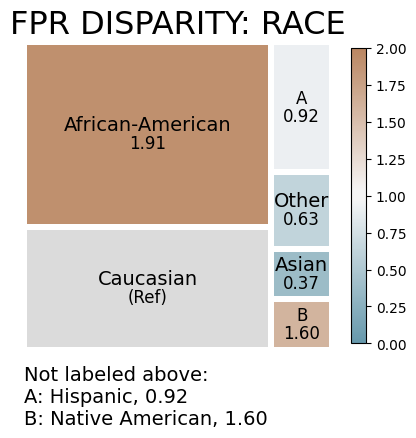

In [28]:
#Esta es la forma más básica de mostrar graficos con Aequitas
#Hay que cambiar todos los titulos y las leyendas a español

#Graficar raza con métrica de falsos positivos
#Aca el usuario debe seleccionar la métrica y la variable que quieren graficar
#La función deja graficar todas las metricas para una variable, o todas las variables para una metrica,
#O tambien una metrica especifica para una variable especifica, como en este caso
aqp.plot_disparity(bdf, group_metric='fpr_disparity', attribute_name='race', significance_alpha=0.05)

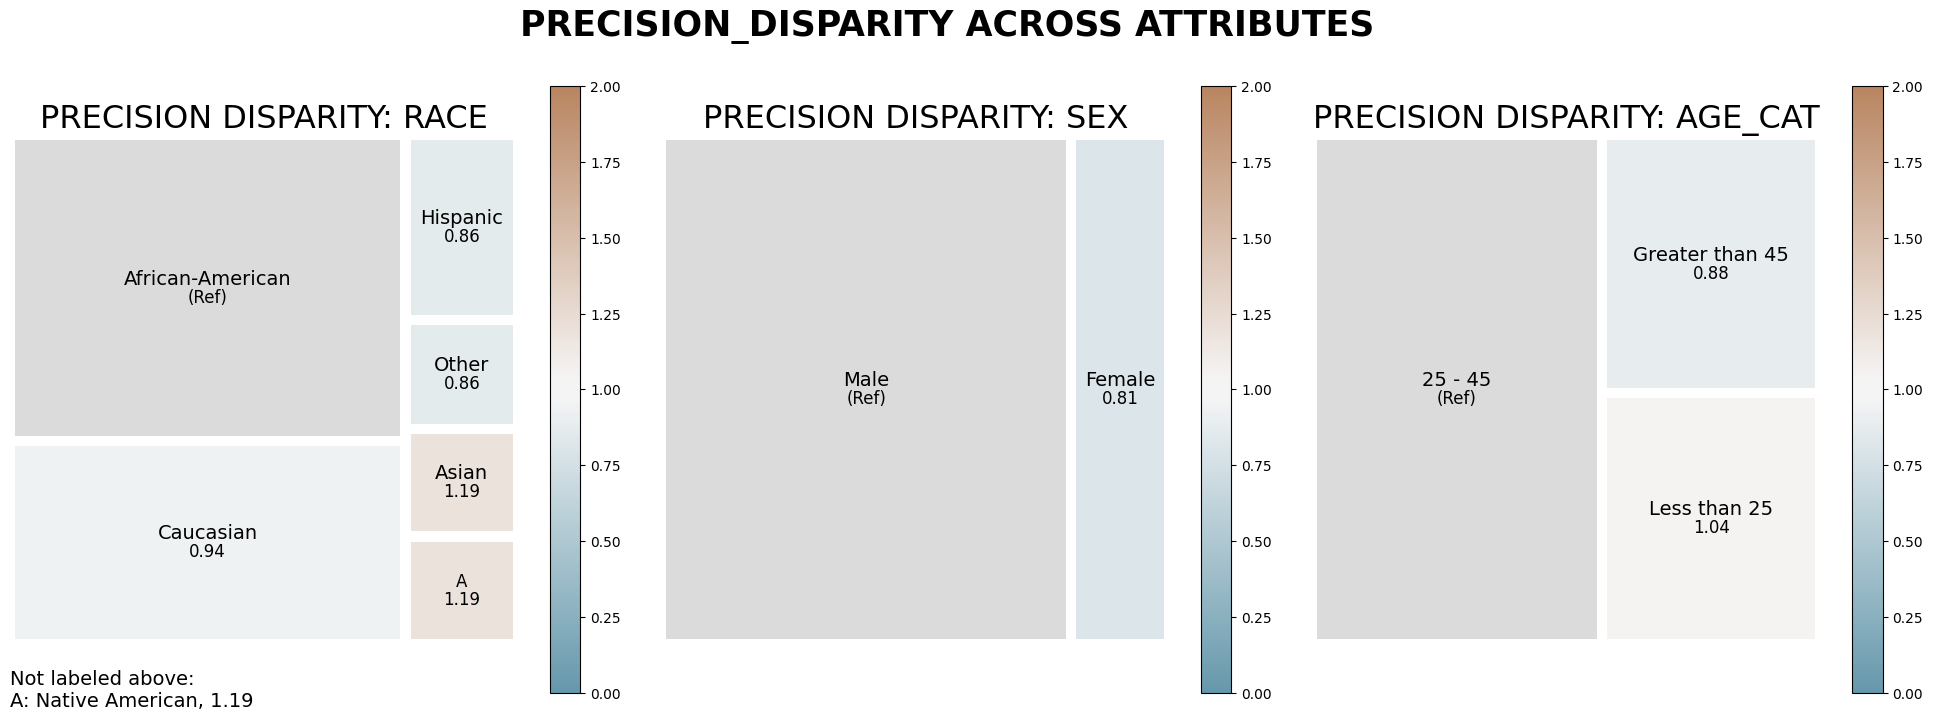

In [29]:
#Todas las variables para una metrica, en este caso precision
#Aca usamos las disparidades calculadas para el grupo de referencia de mayor tamaño, por ejemplo
j = aqp.plot_disparity_all(bdfs, metrics=['precision_disparity'], significance_alpha=0.05)

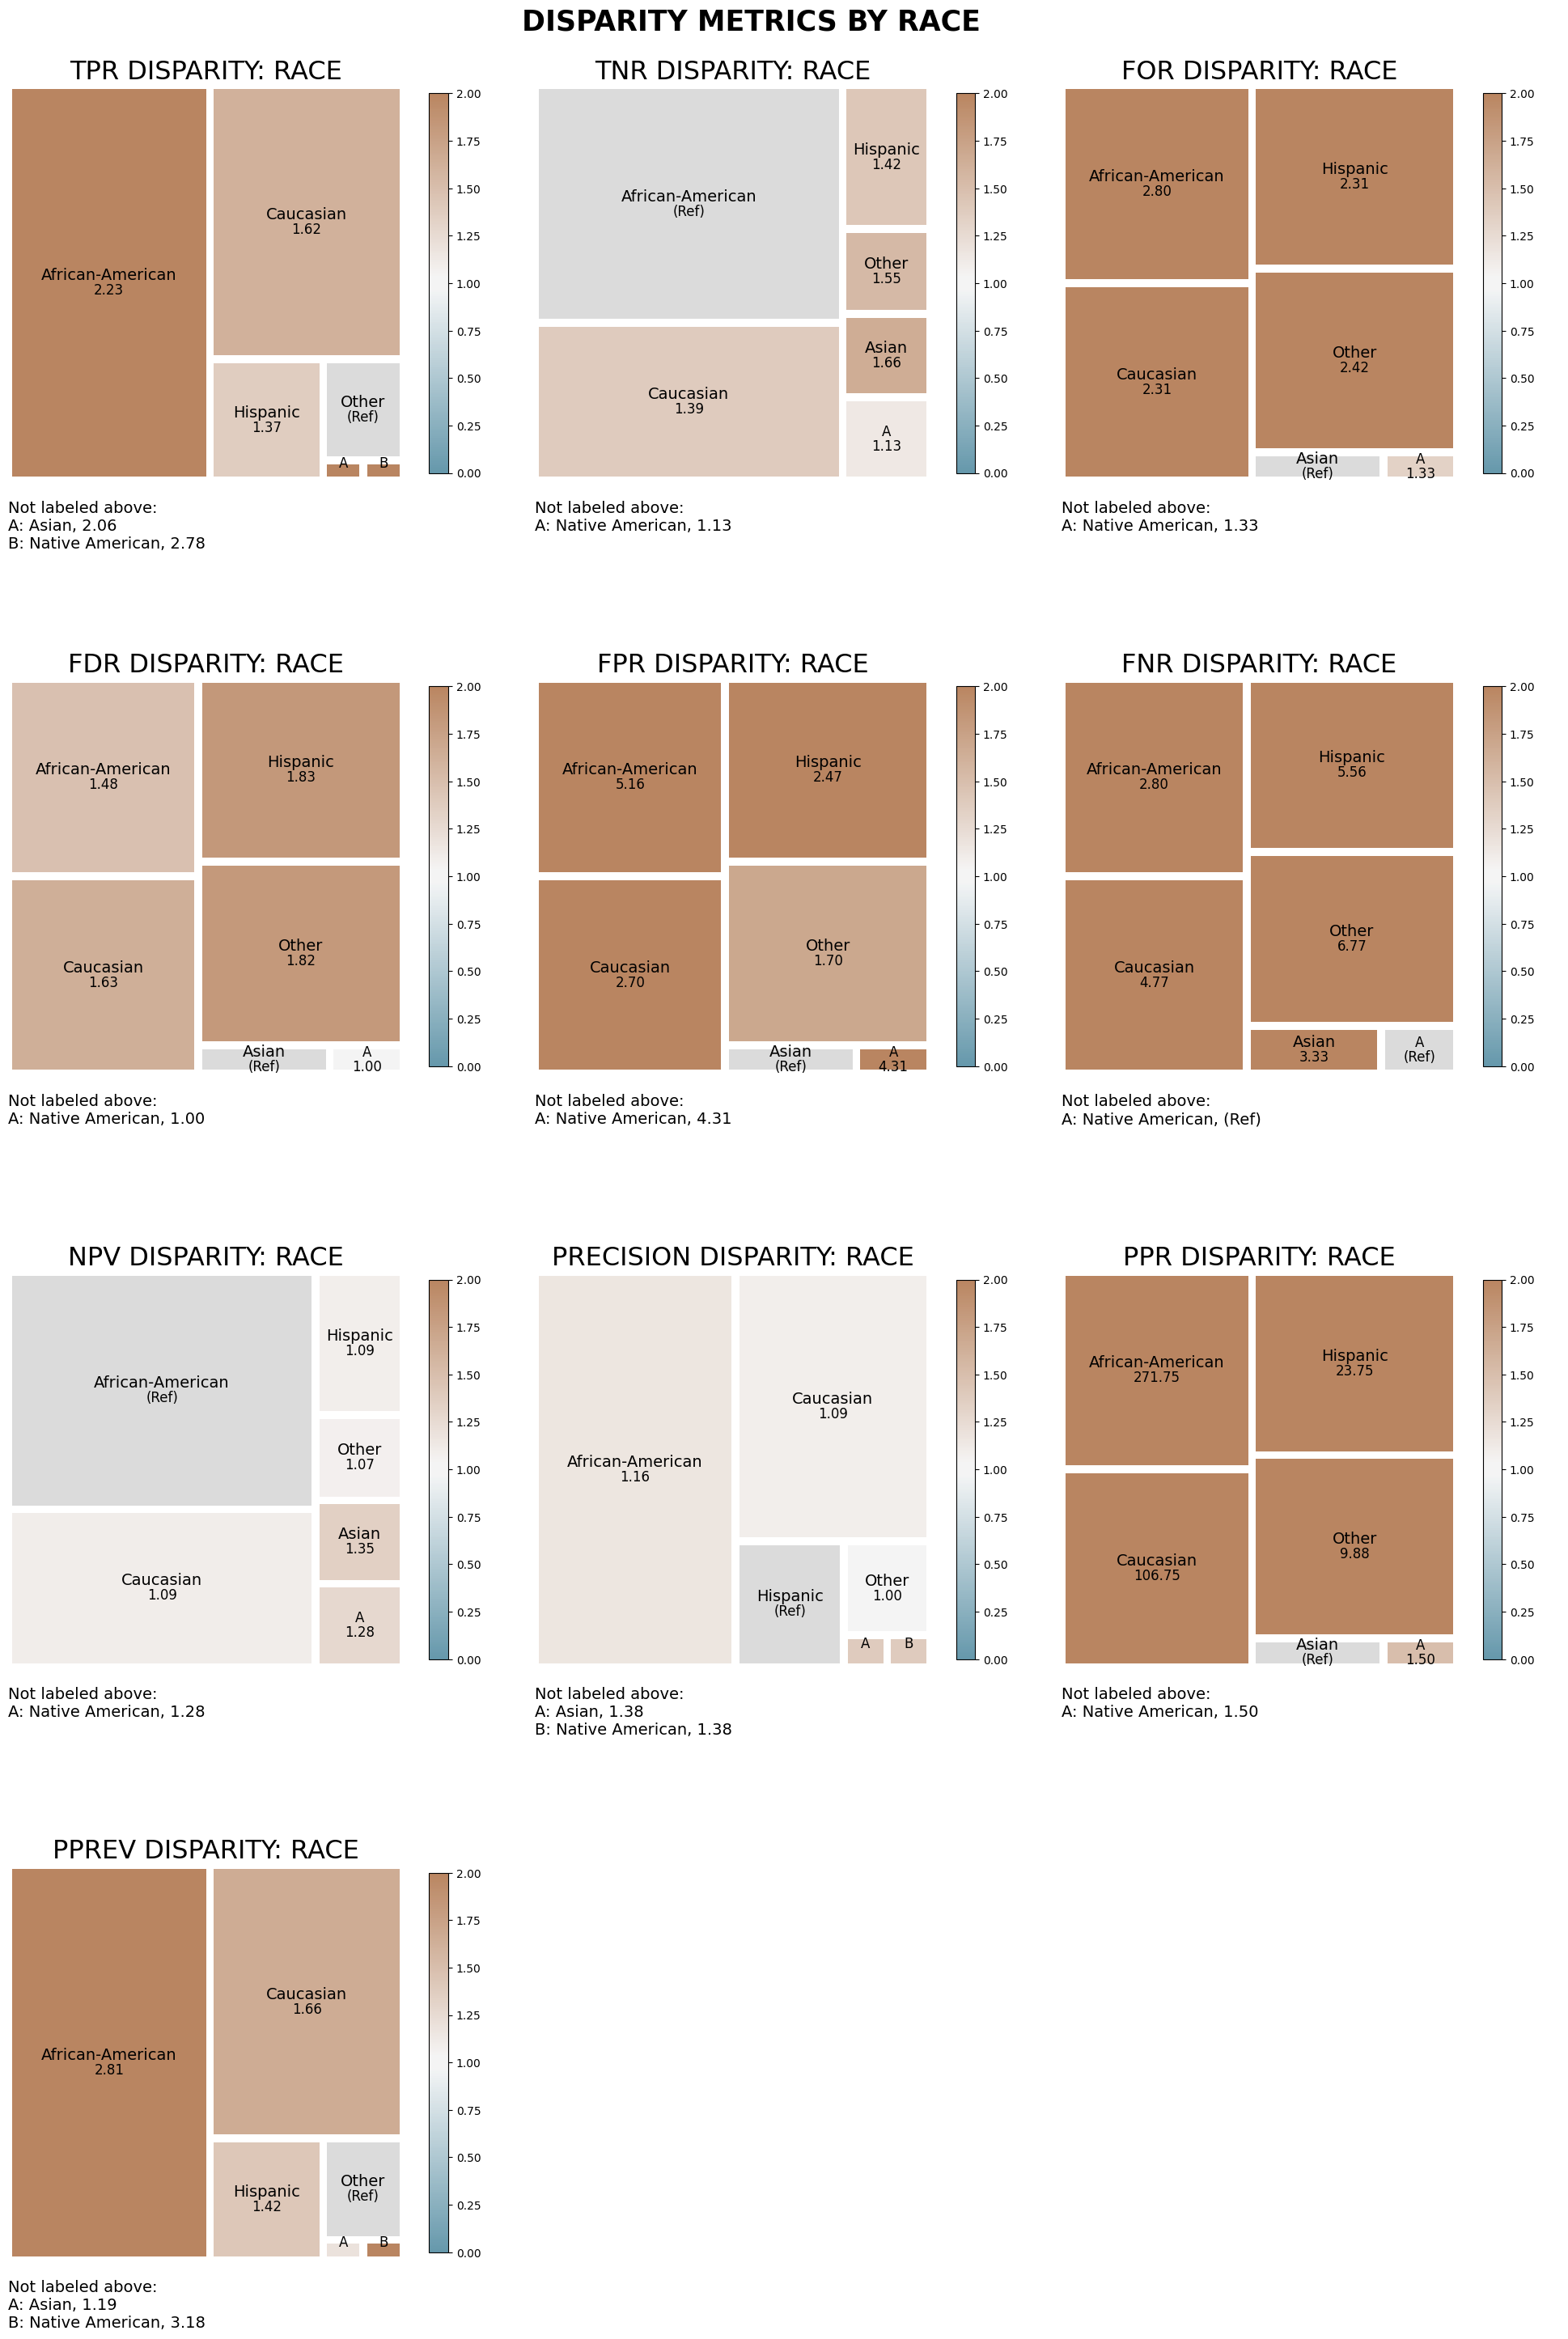

In [30]:
#Todas las metricas para una variable, en este caso raza
#Se usa de ejemplo las disparidades calculadas en base al menor error
tm_capped = aqp.plot_disparity_all(bdfmin, attributes=['race'], metrics = 'all', significance_alpha=0.05)

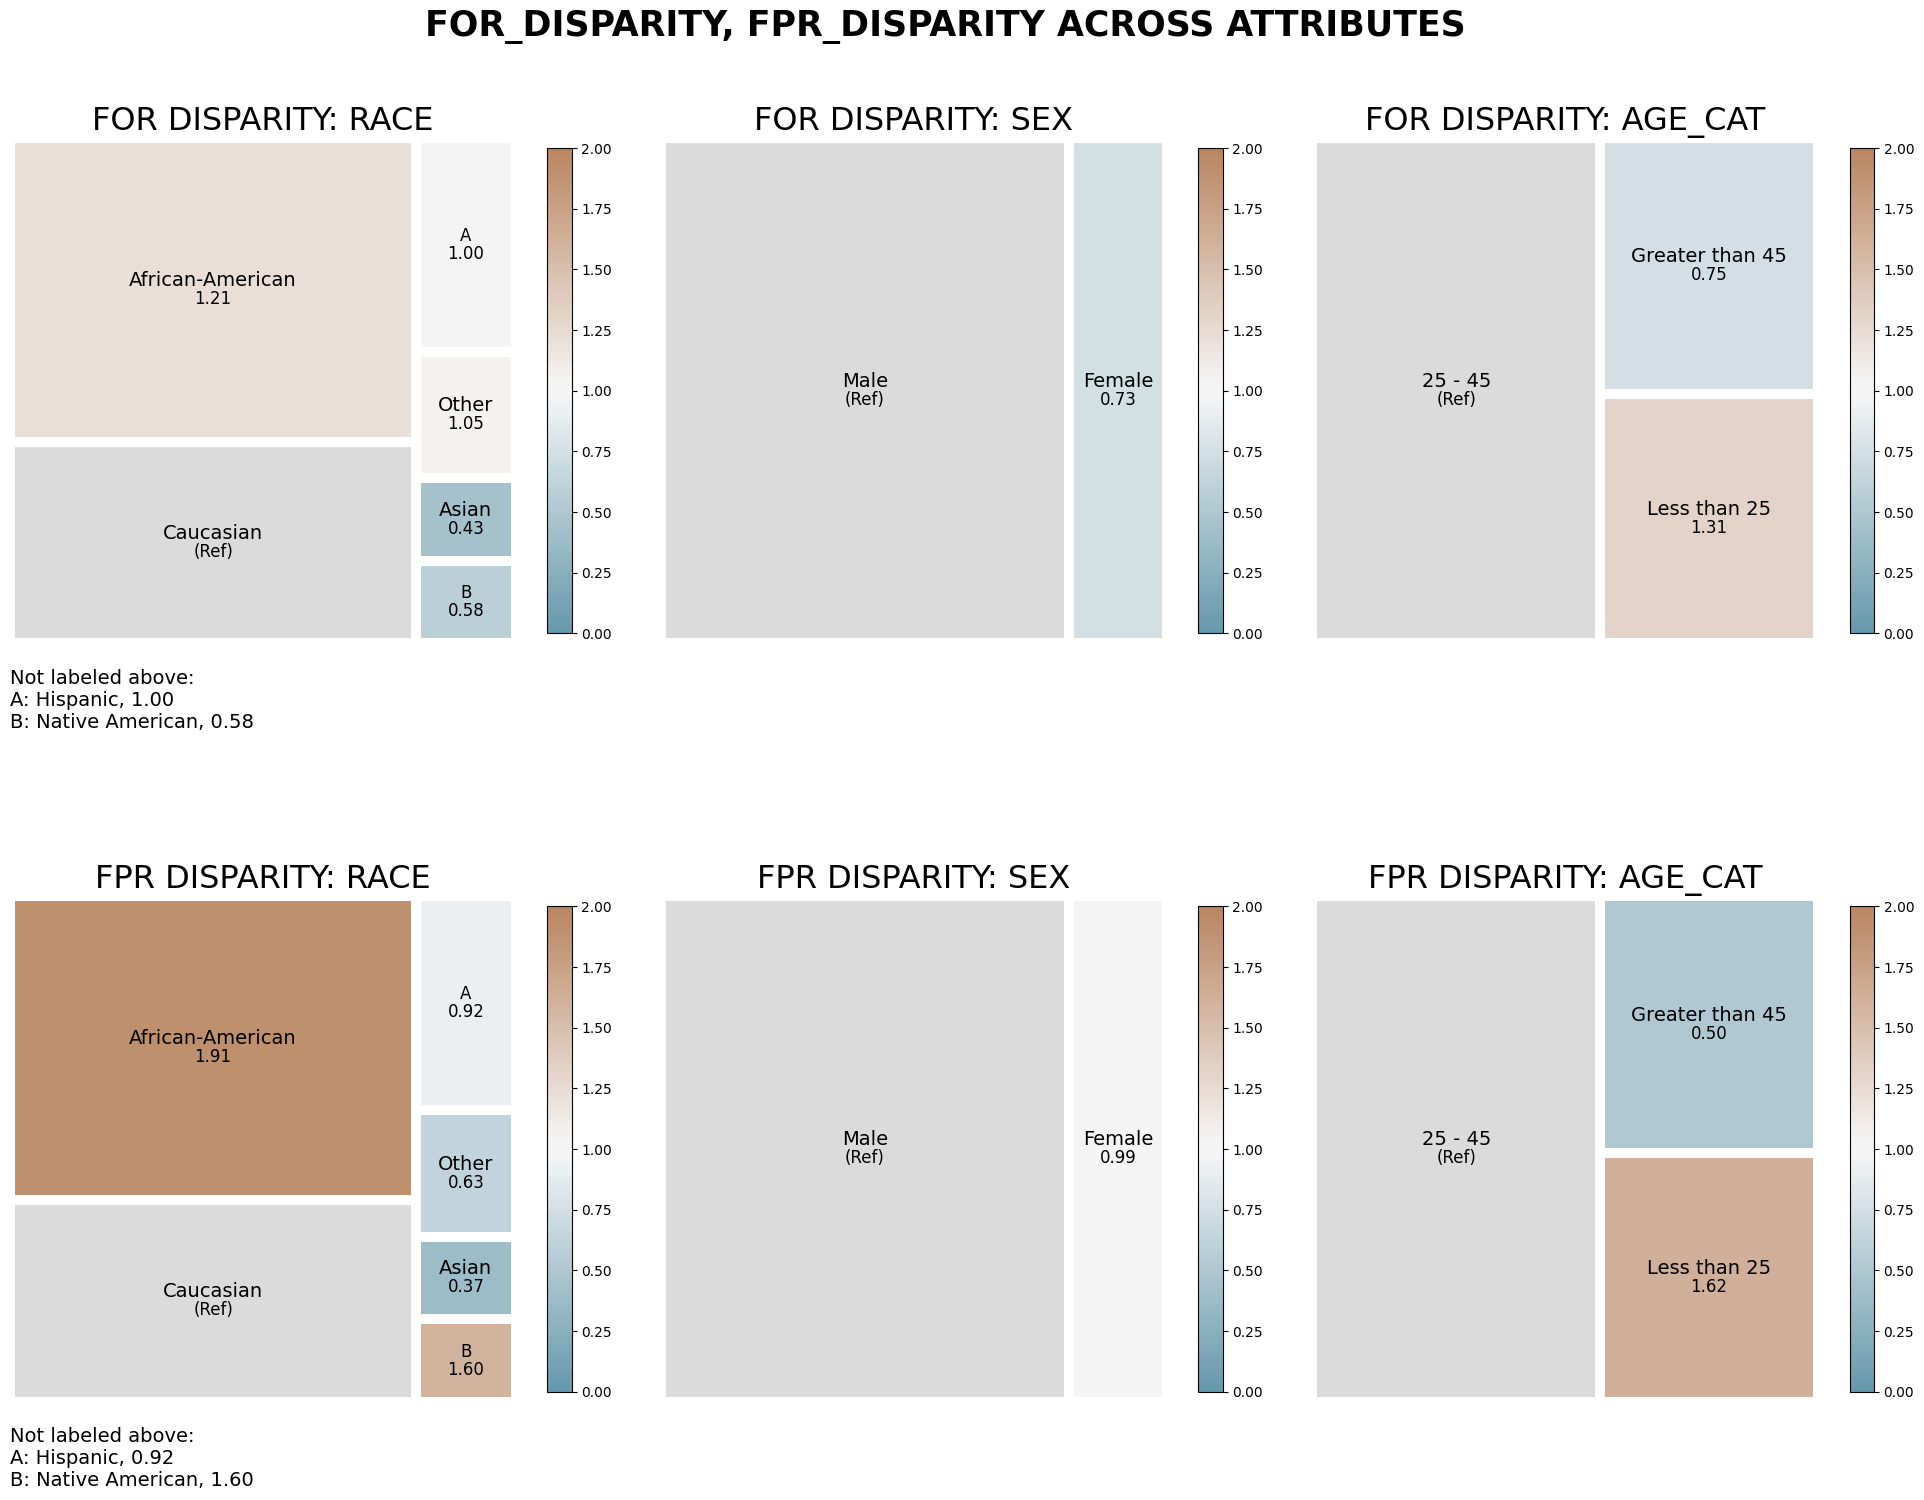

In [ ]:
#El usuario deberia poder identificar cual o cuales métricas le interesa visualizar
dp = aqp.plot_disparity_all(bdf, metrics=['for_disparity', 'fpr_disparity'], attributes=[], significance_alpha=0.05)

Los graficos anteriores son los basicos y estaticos. Otro gráfico que me parece importante incluir es el siguiente, ya que permite mas interacción de usuario. En este gráfico se puede ver el umbral de una manera más clara e ir seleccionando los grupos que se quieren visualizar.

In [32]:
#Grafico de disparidades
#El umbral de tolerancia se definió más arriba
#Las metricas se especificaron más arriba en "metrics", cuando se escogió el umbral de tolerancia
#En este gráfico el usuario define que variable visualizar

audit.disparity_plot(metrics=metrics, attribute='race', fairness_threshold=disparity_tolerance)

alt.LayerChart(...)

In [33]:
#Gráfico de errores (valores absolutos, calculados en Group)
#El usuario debe escoger la variable a visualizar
#Las metricas se especificaron más arriba en "metrics", cuando se escogió el umbral de tolerancia
ap.absolute(bdf, metrics, 'race', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

# Fairness class

Calcula (hay que cambiar los nombres a español):

True Positive Rate Parity: ‘TPR Parity’

True Negative Rate Parity: ‘TNR Parity’

False Omission Rate Parity: ‘FOR Parity’

False Discovery Rate Parity: ‘FDR Parity’

False Positive Rate Parity: ‘FPR Parity’

False Negative Rate Parity: ‘FNR Parity’

Negative Predictive Value Parity: ‘NPV Parity’

Precision Parity: ‘Precision Parity’

Predicted Positive Ratio_k Parity: ‘Statistical Parity’

Predicted Positive Ratio_g Parity: ‘Impact Parity’


**Y también:**

Type I Parity: Fairness in both FDR Parity and FPR Parity

Type II Parity: Fairness in both FOR Parity and FNR Parity

Equalized Odds: Fairness in both FPR Parity and TPR Parity

Unsupervised Fairness: Fairness in both Statistical Parity and Impact Parity

Supervised Fairness: Fairness in both Type I and Type II Parity

Overall Fairness: Fairness across all parities for all attributes

In [34]:
#La clase Fairness sirve para calcular las paridades
#Esto es lo que entrega como resultado el "TRUE" y "FALSE" del analisis de equidad estadística
f = Fairness()
fdf = f.get_group_value_fairness(bdf)

In [35]:
parity_detrminations = f.list_parities(fdf)

In [37]:
#Lista de todas las cosas calculadas, esta es una buena lista si queremos imprimir un reporte
#de las tres partes del análisis, pero es muy larga en si misma

fdf[['attribute_name', 'attribute_value'] + absolute_metrics + b.list_disparities(fdf) + parity_detrminations].style

,attribute_name,attribute_value,accuracy,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,FOR Parity,Impact Parity,TPR Parity,TypeI Parity,FNR Parity,FDR Parity,Precision Parity,Supervised Fairness,FPR Parity,Unsupervised Fairness,TNR Parity,TypeII Parity,NPV Parity,Equalized Odds,Statistical Parity
0,race,African-American,0.638258,0.720147,0.551532,0.349540,0.370285,0.448468,0.279853,0.650460,0.629715,0.655412,0.588203,0.514340,2.545667,1.690224,1.064904,0.906085,1.213154,1.912093,0.586416,1.377549,0.720526,0.913728,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False
1,race,Asian,0.843750,0.666667,0.913043,0.125000,0.250000,0.086957,0.333333,0.875000,0.750000,0.002412,0.250000,0.281250,0.009368,0.718384,1.268317,0.611748,0.433839,0.370749,0.698482,1.275248,1.192808,1.229148,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
2,race,Caucasian,0.669927,0.522774,0.765457,0.288125,0.408665,0.234543,0.477226,0.711875,0.591335,0.257462,0.348003,0.393643,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,race,Hispanic,0.660911,0.443966,0.785185,0.288591,0.457895,0.214815,0.556034,0.711409,0.542105,0.057281,0.298273,0.364207,0.222482,0.857099,0.916748,1.120464,1.001616,0.915887,1.165140,0.849249,1.025773,0.999346,True,True,True,True,True,True,True,True,True,False,True,True,True,True,False
4,race,Native American,0.777778,0.900000,0.625000,0.166667,0.250000,0.375000,0.100000,0.833333,0.750000,0.003618,0.666667,0.555556,0.014052,1.915691,1.268317,0.611748,0.578453,1.598854,0.209544,1.721584,0.816506,1.170618,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
5,race,Other,0.665782,0.323308,0.852459,0.302013,0.455696,0.147541,0.676692,0.697987,0.544304,0.023817,0.209549,0.352785,0.092506,0.602147,0.920466,1.115085,1.048203,0.629057,1.417970,0.618447,1.113660,0.980490,True,False,False,False,False,True,True,False,False,False,True,False,True,False,False
6,sex,Female,0.653763,0.608434,0.678930,0.242537,0.487310,0.321070,0.391566,0.757463,0.512690,0.178173,0.423656,0.356989,0.216801,0.904348,0.806925,1.336425,0.734738,0.990343,1.055810,0.967101,1.004633,1.130710,False,True,True,False,True,False,True,False,True,False,True,False,True,True,False
7,sex,Male,0.653721,0.629132,0.675799,0.330100,0.364637,0.324201,0.370868,0.669900,0.635363,0.821827,0.468465,0.473105,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
8,age_cat,25 - 45,0.647846,0.626257,0.666216,0.323112,0.385135,0.333784,0.373743,0.676888,0.614865,0.580042,0.468240,0.459723,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9,age_cat,Greater than 45,0.704315,0.427711,0.832096,0.241117,0.459391,0.167904,0.572289,0.758883,0.540609,0.118782,0.250000,0.315990,0.204782,0.533914,0.879232,1.192804,0.746232,0.503031,1.531238,0.682963,1.248989,1.121136,False,False,False,False,False,True,True,False,False,False,True,False,True,False,False


In [38]:
#Con esto vemos la tabla solo de Fairness, es decir, el test de equidad estadistica
gaf = f.get_group_attribute_fairness(fdf)
gaf

,model_id,score_threshold,attribute_name,Statistical Parity,Impact Parity,FDR Parity,FPR Parity,FOR Parity,FNR Parity,TPR Parity,TNR Parity,NPV Parity,Precision Parity,TypeI Parity,TypeII Parity,Equalized Odds,Unsupervised Fairness,Supervised Fairness
0,0,binary 0/1,age_cat,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False
1,0,binary 0/1,race,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,0,binary 0/1,sex,False,True,False,True,False,True,True,True,True,True,False,False,True,False,False
